Training dataset: https://github.com/ridhimagarg/Cat-vs-Non-cat-Deep-learning-implementation/blob/master/datasets/train_catvnoncat.h5

Testing dataset: https://github.com/ridhimagarg/Cat-vs-Non-cat-Deep-learning-implementation/blob/master/datasets/test_catvnoncat.h5

In [200]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import pickle

In [128]:
hf1 = h5py.File("../data/raw/train_catvnoncat.h5", "r")
hf2 = h5py.File("../data/raw/test_catvnoncat.h5", "r")

In [129]:
hf1.keys()

<KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>

In [130]:
train_x, train_y, test_x, test_y, classes = hf1.get("train_set_x"), hf1.get("train_set_y"), hf2.get("test_set_x"), hf2.get("test_set_y"), hf1.get("list_classes")

In [131]:
train_set_x_orig, train_set_y, classes = np.array(train_x), np.array(train_y), np.array(classes)

In [132]:
test_set_x_orig, test_set_y = np.array(test_x), np.array(test_y)

In [133]:
train_set_x_orig.shape, train_set_y.shape

((209, 64, 64, 3), (209,))

In [134]:
test_set_x_orig.shape, test_set_y.shape

((50, 64, 64, 3), (50,))

In [135]:
idx = np.random.randint(0, 208)

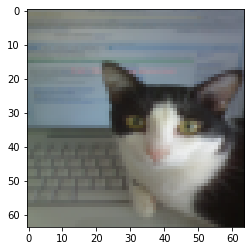

In [136]:
plt.imshow(train_set_x_orig[idx])
plt.show()

In [137]:
y = train_set_y[idx]
print(f"y = {y}. It is a '{classes[y].decode('utf-8')}' picture.")

y = 1. It is a 'cat' picture.


In [138]:
train_set_x_orig.min(), train_set_x_orig.max()

(0, 255)

In [139]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

train_set_x_flatten.shape, test_set_x_flatten.shape

((12288, 209), (12288, 50))

In [140]:
train_set_y = train_set_y.reshape(1, train_set_y.shape[0])
test_set_y = test_set_y.reshape(1, test_set_y.shape[0])

train_set_y.shape, test_set_y.shape

((1, 209), (1, 50))

In [141]:
train_set_x = train_set_x_flatten / 255
test_set_x = test_set_x_flatten / 255

In [142]:
train_set_x.min(), train_set_x.max()

(0.0, 1.0)

In [171]:
np.save("../data/processed/train_set_x", train_set_x)
np.save("../data/processed/train_set_y", train_set_y)
np.save("../data/processed/test_set_x", test_set_x)
np.save("../data/processed/test_set_y", test_set_y)
np.save("../data/processed/classes", classes)

c:\users\matija\desktop\main\ai\development\dev\lib\site-packages\numpy\lib\format.py:362: UserWarning: metadata on a dtype may be saved or ignored, but will raise if saved when read. Use another form of storage.
  d['descr'] = dtype_to_descr(array.dtype)


In [172]:
#loaded_train_set_x = np.load("../data/processed/train_set_x.npy")

In [155]:
def sigmoid(z):
    
    return 1 / (1 + np.exp(-z))

In [156]:
def initialize_parameters(dim):
    
    w = np.zeros((dim, 1))
    b = 0.
    
    return w, b

In [157]:
def propagate(w, b, X, Y):
    
    m = X.shape[1]
    
    Z = w.T@X + b
    A = sigmoid(Z)
    
    cost = -1/m * (Y@np.log(A).T + (1-Y)@np.log(1-A).T)
    
    dz = A-Y
    
    dw = 1/m * X@dz.T
    db = 1/m * np.sum(dz)

    grads = {"dw": dw,
             "db": db}
    
    return grads, cost.item()

In [158]:
def optimize(w, b, X, Y, n_iterations=100, lr=0.009, print_cost=False):
    
    
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    
    costs = []
    
    for i in range(n_iterations):
        
        grads, cost = propagate(w, b, X, Y)
        
        dw = grads["dw"]
        db = grads["db"]
        
        w -= lr*dw
        b -= lr*db
        
        if not i % 100:
            
            costs.append(cost)
            
            if print_cost:
                print(f"Cost at the {i}. iteration: {cost}")
        
    params = {"w": w,
              "b": b}
    
    return params, costs

In [159]:
def predict(w, b, X):
    
    Z = w.T@X + b
    A = sigmoid(Z)
    
    Y_prediction = (A >= .5).astype(int)
    
    return Y_prediction

In [207]:
def model(X_train, Y_train, X_test, Y_test, n_iterations=2000, lr=0.5, print_cost=False, w=None, b=None):
    
    if w is None and b == None:
        w, b = initialize_parameters(X_train.shape[0])
        params, costs = optimize(w, b, X_train, Y_train, n_iterations, lr, print_cost)
        w = params["w"]
        b = params["b"]
    else:
        w, b = w, b
    
    Y_prediction_train = predict(w, b, X_train)
    Y_prediction_test = predict(w, b, X_test)
    
    train_acc = (Y_train == Y_prediction_train).sum() / len(Y_train.T)
    test_acc = (Y_test == Y_prediction_test).sum() / len(Y_test.T)
    
    print(f"\nTrain acc: {train_acc}, Test acc: {test_acc}")
    
    d = {"Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : lr,
         "num_iterations": n_iterations}
    
    if "costs" in locals():
        d["costs"] = costs
    
    return d

In [211]:
logistic_regression_model = model(train_set_x, train_set_y, test_set_x, test_set_y, n_iterations=2000, lr=0.005, print_cost=True, w=None, b=None)

Cost at the 0. iteration: 0.6931471805599453
Cost at the 100. iteration: 0.5845083636993086
Cost at the 200. iteration: 0.4669490409465547
Cost at the 300. iteration: 0.37600686694802077
Cost at the 400. iteration: 0.3314632893282512
Cost at the 500. iteration: 0.303273067474383
Cost at the 600. iteration: 0.2798795865826048
Cost at the 700. iteration: 0.2600421369258757
Cost at the 800. iteration: 0.2429406846779662
Cost at the 900. iteration: 0.22800422256726066
Cost at the 1000. iteration: 0.21481951378449635
Cost at the 1100. iteration: 0.20307819060644985
Cost at the 1200. iteration: 0.19254427716706862
Cost at the 1300. iteration: 0.183033337968835
Cost at the 1400. iteration: 0.17439859438448874
Cost at the 1500. iteration: 0.16652139705400326
Cost at the 1600. iteration: 0.15930451829756614
Cost at the 1700. iteration: 0.15266732471296504
Cost at the 1800. iteration: 0.1465422350398234
Cost at the 1900. iteration: 0.1408720757031016

Train acc: 0.9904306220095693, Test acc: 0.7

In [201]:
parameters = {"weights": logistic_regression_model["w"],
              "bias": logistic_regression_model["b"]}

In [202]:
file = open("../models/model_parameters.pickle", "wb")
pickle.dump(parameters, file)